In [5]:
import re
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

# Training and test set: Sentiment 140

In [33]:
df = pd.read_csv('/Users/alexnegron/Downloads/trainingandtestdata.csv', header=None, names=['id','sentiment','source','text'], error_bad_lines=False)


/Users/alexnegron/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df.head()

,id,sentiment,source,text
0,ItemID,Sentiment,SentimentSource,SentimentText
1,1,0,Sentiment140,is so sad for my APL frie...
2,2,0,Sentiment140,I missed the New Moon trail...
3,3,1,Sentiment140,omg its already 7:30 :O
4,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...


In [35]:
df = df.drop(columns=['id', 'source'])

In [36]:
df

,sentiment,text
0,Sentiment,SentimentText
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
...,...,...
1578610,1,Zzzzzz.... Finally! Night tweeters!
1578611,1,"Zzzzzzz, sleep well people"
1578612,0,ZzzZzZzzzZ... wait no I have homework.
1578613,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [37]:
df = df.drop([0])
df

,sentiment,text
1,0,is so sad for my APL frie...
2,0,I missed the New Moon trail...
3,1,omg its already 7:30 :O
4,0,.. Omgaga. Im sooo im gunna CRy. I'...
5,0,i think mi bf is cheating on me!!! ...
...,...,...
1578610,1,Zzzzzz.... Finally! Night tweeters!
1578611,1,"Zzzzzzz, sleep well people"
1578612,0,ZzzZzZzzzZ... wait no I have homework.
1578613,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [38]:
df.reset_index(drop=True)

,sentiment,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578609,1,Zzzzzz.... Finally! Night tweeters!
1578610,1,"Zzzzzzz, sleep well people"
1578611,0,ZzzZzZzzzZ... wait no I have homework.
1578612,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [40]:
pd.set_option('display.max_colwidth', None) # let's you see more text in the dataframe cells

# Cleaning

`tweet_cleaner` is a much better text cleaner. Does more than what the previous cleaner did, like handle negations such as "don't." 

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer


tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
#     ps = PorterStemmer()
#     stemmed_words = [ps.stem(w) for w in words]
    
    return (" ".join(words)).strip()


In [47]:
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['is so sad for my apl friend',
 'miss the new moon trailer',
 'omg it alreadi',
 'omgaga im sooo im gunna cri ve been at thi dentist sinc wa supos just get crown put on min',
 'think mi bf is cheat on me',
 'or just worri too much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunni again work tomorrow tv tonight',
 'hand in my uniform today miss you alreadi',
 'hmmmm wonder how she my number',
 'must think about posit',
 'thank to all the hater up in my face all day',
 'thi weekend ha suck so far',
 'jb isnt show in australia ani more',
 'ok that it you win',
 'thi is the way feel right now',
 'awhh man complet useless rt now funni all can do is twitter',
 'feel strang fine now gonna go listen to some semison to celebr',
 'huge roll of thunder just now so scari',
 'just cut my beard off it onli been grow for well over year gonna start it over is happi in the meantim',
 'veri sad about iran',
 'wompppp wompp',
 'you re the onli one who can see thi caus no one els is follow me thi is for you

In [48]:
# this line takes a while, cleaning the whole train/test set; stemming/lemmatization takes some time
df['text'] = df['text'].apply(lambda txt : tweet_cleaner(txt))



In [50]:
df

,sentiment,text
1,0,is so sad for my apl friend
2,0,missed the new moon trailer
3,1,omg its already
4,0,omgaga im sooo im gunna cry ve been at this dentist since was suposed just get crown put on mins
5,0,think mi bf is cheating on me
...,...,...
1578610,1,zzzzzz finally night tweeters
1578611,1,zzzzzzz sleep well people
1578612,0,zzzzzzzzzz wait no have homework
1578613,0,zzzzzzzzzzzzz meh what am doing up again


In [51]:
clean_df = df

In [52]:
clean_df

,sentiment,text
1,0,is so sad for my apl friend
2,0,missed the new moon trailer
3,1,omg its already
4,0,omgaga im sooo im gunna cry ve been at this dentist since was suposed just get crown put on mins
5,0,think mi bf is cheating on me
...,...,...
1578610,1,zzzzzz finally night tweeters
1578611,1,zzzzzzz sleep well people
1578612,0,zzzzzzzzzz wait no have homework
1578613,0,zzzzzzzzzzzzz meh what am doing up again


In [53]:
clean_df = clean_df.rename(columns={'sentiment':'target'})
clean_df

,target,text
1,0,is so sad for my apl friend
2,0,missed the new moon trailer
3,1,omg its already
4,0,omgaga im sooo im gunna cry ve been at this dentist since was suposed just get crown put on mins
5,0,think mi bf is cheating on me
...,...,...
1578610,1,zzzzzz finally night tweeters
1578611,1,zzzzzzz sleep well people
1578612,0,zzzzzzzzzz wait no have homework
1578613,0,zzzzzzzzzzzzz meh what am doing up again


In [54]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578614 entries, 1 to 1578614
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1578614 non-null  object
 1   text    1578614 non-null  object
dtypes: object(2)
memory usage: 36.1+ MB


In [55]:
clean_df[clean_df.isnull().any(axis=1)].head() # any null entries? 

,target,text


In [56]:
np.sum(clean_df.isnull().any(axis=1)) # nope!

0

Time now to export the clean training/test set.

In [57]:
clean_df.to_csv('clean_trainingtest')

Now we can explore this training/test set.

In [58]:
neg_tweets = clean_df[clean_df['target']==0]
neg_string = []
for t in neg_tweets['text']:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

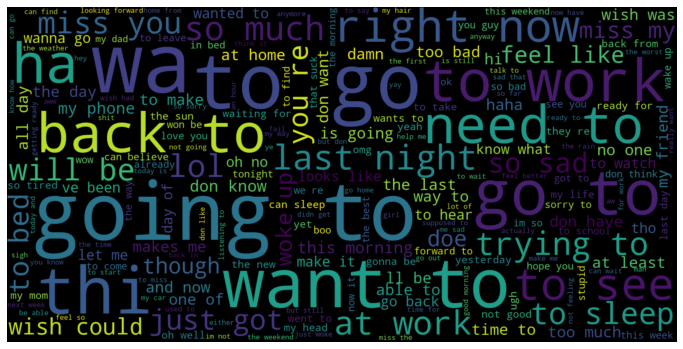

In [59]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'AxesImage' object has no property 'interpolatin'

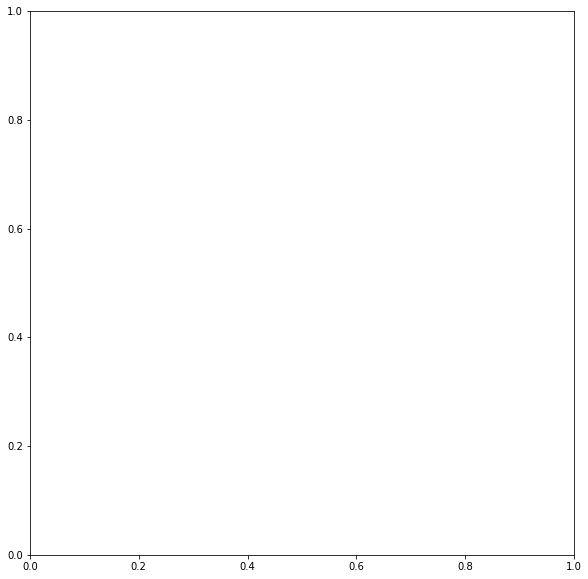

In [61]:
pos_tweets = clean_df[clean_df['target']==1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma').generate(pos_string)

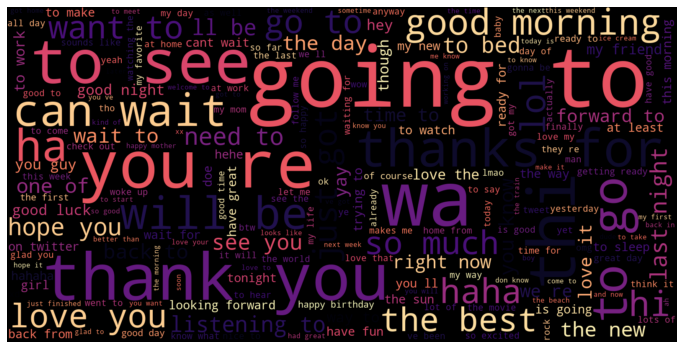

In [62]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Train / Development / Test split

- train set: sample of the data used for learning
- development set (i.e. "hold-out cross validation set"): sample of data used to tune the parameters of a classifier + provide an unbiased evaluation of a model
- test set: sample of data used to asses the performance of a final model

Ratio: 98/1/1. Note that 1% of 1.5 million data entries is still significant: 15,000 data entries to test on. 

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

In [46]:
my_df = pd.read_csv('/Users/alexnegron/clean_trainingtest')

In [47]:
my_df['target'] = my_df['target'].apply(lambda x : int(x))

In [48]:
my_df

,Unnamed: 0,target,text
0,1,0,is so sad for my apl friend
1,2,0,missed the new moon trailer
2,3,1,omg its already
3,4,0,omgaga im sooo im gunna cry ve been at this de...
4,5,0,think mi bf is cheating on me
...,...,...,...
1578609,1578610,1,zzzzzz finally night tweeters
1578610,1578611,1,zzzzzzz sleep well people
1578611,1578612,0,zzzzzzzzzz wait no have homework
1578612,1578613,0,zzzzzzzzzzzzz meh what am doing up again


In [49]:
my_df = my_df.drop(columns=['Unnamed: 0'])

In [50]:
my_df

,target,text
0,0,is so sad for my apl friend
1,0,missed the new moon trailer
2,1,omg its already
3,0,omgaga im sooo im gunna cry ve been at this de...
4,0,think mi bf is cheating on me
...,...,...
1578609,1,zzzzzz finally night tweeters
1578610,1,zzzzzzz sleep well people
1578611,0,zzzzzzzzzz wait no have homework
1578612,0,zzzzzzzzzzzzz meh what am doing up again


In [51]:
my_df.reset_index(drop=True, inplace=True)

In [52]:
my_df

,target,text
0,0,is so sad for my apl friend
1,0,missed the new moon trailer
2,1,omg its already
3,0,omgaga im sooo im gunna cry ve been at this de...
4,0,think mi bf is cheating on me
...,...,...
1578609,1,zzzzzz finally night tweeters
1578610,1,zzzzzzz sleep well people
1578611,0,zzzzzzzzzz wait no have homework
1578612,0,zzzzzzzzzzzzz meh what am doing up again


In [53]:
my_df.target.unique()

array([0, 1])

In [54]:
seed = 2000

x = my_df.text
y = my_df.target

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size = .02, random_state=seed)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=seed)


Originally when I ran this, I the split betweetn positive and negative targets was not 50/50, which didn't make sense. Turns out that some of the 0s and 1s were cast as strings, not ints. So I had to apply a lambda function that cast that entire column as ints. Now it's fixed.

In [55]:
print('Train set has a total {0} entries with {1:.2f} negative, {2:.2f} positive.'.format(len(x_train),
                                                                              (len(x_train[y_train==0])/(len(x_train)*1.))*100,
                                                                               (len(x_train[y_train==1])/(len(x_train)*1.))*100))






Train set has a total 1547041 entries with 49.95 negative, 50.05 positive.


In [56]:
print('Validation set has a total {0} entries with {1:.2f} negative, {2:.2f} positive.'.format(len(x_validation),
                                                                              (len(x_validation[y_validation==0])/(len(x_validation)*1.))*100,
                                                                               (len(x_validation[y_validation==1])/(len(x_validation)*1.))*100))




Validation set has a total 15786 entries with 49.67 negative, 50.33 positive.


In [57]:
print('Test set has a total {0} entries with {1:.2f} negative, {2:.2f} positive.'.format(len(x_test),
                                                                              (len(x_test[y_test==0])/(len(x_test)*1.))*100,
                                                                               (len(x_test[y_test==1])/(len(x_test)*1.))*100))




Test set has a total 15787 entries with 49.98 negative, 50.02 positive.


## Baseline: TextBlob sentiment analyzer

In [17]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
x_validation = x_validation.to_frame()

In [60]:
x_validation = x_validation.applymap(str)

In [61]:
x_validation

,text
1202534,this drink is making my throat hurt more and n...
1200090,there gonna be movie on no can see it not even...
1262183,the wire on my braces is too long and is cutti...
667427,finally have uploaded my documentary to an ext...
1491418,lovely national day today hour children parade...
...,...
1483533,just talked on the phone for lik hrs with this...
95719,sounds good the first dls are definately the h...
328228,marty yeah ll be back home then
297005,oh no yea spontaneous was good but it did mean...


In [22]:
def remove_floats(row):
    if isinstance(row, str):
        return row
    else:
        return None

In [23]:
for key in x_validation: 
    x_validation[key] = x_validation[key].apply(remove_floats)

In [24]:
x_validation.dropna(inplace=True)

In [62]:
tbresult=[TextBlob(txt).sentiment.polarity for txt in x_validation['text']]


In [63]:
tbpred = [0 if n < 0 else 1 for n in tbresult]

In [64]:
tbpred[:10]

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

In [65]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'], columns=['predicted_positive', 'predicted_negative'])


print(
'Accuracy Score: {0:.2f}'.format(accuracy_score(y_validation, tbpred)*100)
)
print('-'*60)
print('Confusion Matrix \n')
print(confusion)
print('-'*60)
print('Classification Report \n')
print(classification_report(y_validation, tbpred))

Accuracy Score: 61.30
------------------------------------------------------------
Confusion Matrix 

          predicted_positive  predicted_negative
positive                7125                 820
negative                5289                2552
------------------------------------------------------------
Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.33      0.46      7841
           1       0.57      0.90      0.70      7945

    accuracy                           0.61     15786
   macro avg       0.67      0.61      0.58     15786
weighted avg       0.66      0.61      0.58     15786



# Baseline: VADER sentiment analyzer

In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [67]:
analyser = SentimentIntensityAnalyzer()

In [68]:
sentence = 'food is amazing'
analyser.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

- positive: compound $\geq$ 0.05
- negative: compound $\leq$ -0.05

For the sake of simplicity, we'll say that positive sentiment is compound $\geq 0$ and negative sentiment is compound $< 0$.

In [69]:
vader_result = [analyser.polarity_scores(txt) for txt in x_validation['text'] ]

In [70]:
vader_result[:5]

[{'neg': 0.116, 'neu': 0.816, 'pos': 0.068, 'compound': -0.34},
 {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.7096},
 {'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.5574},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5859}]

In [71]:
vader_pred = [0 if x['compound'] < 0 else 1 for x in vader_result]

In [72]:
vader_pred[:10]

[0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

In [73]:
conmat = np.array(confusion_matrix(y_validation, vader_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'], columns=['predicted_positive', 'predicted_negative'])


print(
'Accuracy Score: {0:.2f}'.format(accuracy_score(y_validation, vader_pred)*100)
)
print('-'*60)
print('Confusion Matrix \n')
print(confusion)
print('-'*60)
print('Classification Report \n')
print(classification_report(y_validation, vader_pred))

Accuracy Score: 66.43
------------------------------------------------------------
Confusion Matrix 

          predicted_positive  predicted_negative
positive                7138                 807
negative                4493                3348
------------------------------------------------------------
Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.43      0.56      7841
           1       0.61      0.90      0.73      7945

    accuracy                           0.66     15786
   macro avg       0.71      0.66      0.64     15786
weighted avg       0.71      0.66      0.64     15786



For explanation of the classification report, see: https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

# TF-IDF vectorization and various ML models

In [1]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
def get_tfidf_features(train_fit, ngrams=(1,1)):
    vector = TfidfVectorizer(ngrams, sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [6]:
data = pd.read_csv('/Users/alexnegron/clean_trainingtest')

In [7]:
data = data.drop(columns=['Unnamed: 0'])

In [88]:
data.head()

,target,text
0,0,is so sad for my apl friend
1,0,missed the new moon trailer
2,1,omg its already
3,0,omgaga im sooo im gunna cry ve been at this de...
4,0,think mi bf is cheating on me


In [8]:
data['text'] = data['text'].apply(lambda x: np.str_(x))

In [9]:
unigrams = (1,1)
bigrams = (2,2)
trigrams = (3,3)
uni_and_bigrams = (1,2)
uni_bi_and_trigrams = (1,3)

In [22]:
tf_vector = get_tfidf_features(data['text'], bigrams)

In [23]:
X = tf_vector.transform(data['text'])

y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state=2000)




In [15]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)

In [18]:
conmat = np.array(confusion_matrix(y_test, y_predict_nb, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'], columns=['predicted_positive', 'predicted_negative'])

print(
'Accuracy Score: {0:.2f}'.format(accuracy_score(y_test, y_predict_nb)*100)
)
print('-'*60)
print('Confusion Matrix \n')
print(confusion)
print('-'*60)
print('Classification Report \n')
print(classification_report(y_test, y_predict_nb))


Accuracy Score: 77.19
------------------------------------------------------------
Confusion Matrix 

          predicted_positive  predicted_negative
positive                6060                1890
negative                1711                6126
------------------------------------------------------------
Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      7837
           1       0.78      0.76      0.77      7950

    accuracy                           0.77     15787
   macro avg       0.77      0.77      0.77     15787
weighted avg       0.77      0.77      0.77     15787



In [19]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)

/Users/alexnegron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
conmat = np.array(confusion_matrix(y_test, y_predict_lr, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'], columns=['predicted_positive', 'predicted_negative'])

print(
'Accuracy Score: {0:.2f}'.format(accuracy_score(y_test, y_predict_lr)*100)
)
print('-'*60)
print('Confusion Matrix \n')
print(confusion)
print('-'*60)
print('Classification Report \n')
print(classification_report(y_test, y_predict_lr))

Accuracy Score: 79.63
------------------------------------------------------------
Confusion Matrix 

          predicted_positive  predicted_negative
positive                6490                1460
negative                1756                6081
------------------------------------------------------------
Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      7837
           1       0.79      0.82      0.80      7950

    accuracy                           0.80     15787
   macro avg       0.80      0.80      0.80     15787
weighted avg       0.80      0.80      0.80     15787

